In [5]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize #package for flattening json in pandas df



In [3]:
df = pd.read_json(r"C:\Users\Koushik\Downloads\open-data-master\open-data-master\data\events\7298.json")
df.head()

,bad_behaviour,ball_receipt,ball_recovery,block,dribble,duel,duration,foul_committed,foul_won,goalkeeper,...,possession_team,related_events,second,shot,substitution,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,"{'id': 746, 'name': 'Manchester City WFC'}",NaN,0,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...","{'id': 746, 'name': 'Manchester City WFC'}",2018-11-30 00:00:00.000,"{'id': 35, 'name': 'Starting XI'}",NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,"{'id': 746, 'name': 'Manchester City WFC'}",NaN,0,NaN,NaN,"{'formation': 352, 'lineup': [{'player': {'id'...","{'id': 971, 'name': 'Chelsea LFC'}",2018-11-30 00:00:00.000,"{'id': 35, 'name': 'Starting XI'}",NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,8.16,NaN,NaN,NaN,...,"{'id': 746, 'name': 'Manchester City WFC'}",[c771a4d4-51cb-41de-83aa-7103cd199c92],0,NaN,NaN,NaN,"{'id': 971, 'name': 'Chelsea LFC'}",2018-11-30 00:00:00.000,"{'id': 18, 'name': 'Half Start'}",NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,7.96,NaN,NaN,NaN,...,"{'id': 746, 'name': 'Manchester City WFC'}",[48b94b06-ebbd-47e9-958c-44bf63622f5e],0,NaN,NaN,NaN,"{'id': 746, 'name': 'Manchester City WFC'}",2018-11-30 00:00:00.000,"{'id': 18, 'name': 'Half Start'}",NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,...,"{'id': 971, 'name': 'Chelsea LFC'}",[237cac8c-5cb0-4015-9d08-c7df9699a136],0,NaN,NaN,NaN,"{'id': 971, 'name': 'Chelsea LFC'}",2018-11-30 00:00:00.100,"{'id': 30, 'name': 'Pass'}",NaN


In [6]:
shot = df[(df.possession_team =={'id': 971, 'name': 'Chelsea LFC'}) & (df.type == {'id': 16, 'name': 'Shot'})] 
#change possession_team to get shots by a different team

In [7]:
df_2 = pd.DataFrame(shot.location)
df_2[['X_axis','Y_axis']] = pd.DataFrame(shot.location.values.tolist(), index= shot.location.index) #df_2 has the x,y coordinate

In [17]:
df_2

,location,X_axis,Y_axis
33,"[115.0, 25.0]",115.0,25.0
186,"[109.0, 51.0]",109.0,51.0
192,"[99.0, 52.0]",99.0,52.0
196,"[107.0, 40.0]",107.0,40.0
204,"[108.0, 32.0]",108.0,32.0
583,"[108.0, 32.0]",108.0,32.0
695,"[87.0, 41.0]",87.0,41.0
749,"[108.0, 36.0]",108.0,36.0
765,"[105.0, 43.0]",105.0,43.0
1060,"[112.0, 39.0]",112.0,39.0


In [9]:
x_axis = df_2.X_axis.values.tolist()
y_axis = df_2.Y_axis.values.tolist()

In [10]:
import matplotlib.pyplot as plt
from scipy.misc import imread
import matplotlib.cbook as cbook

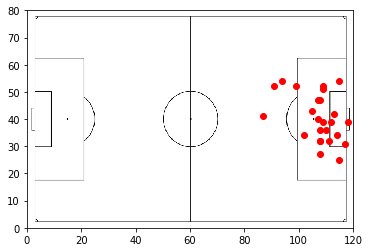

In [12]:
img = plt.imread(r'C:\Users\Koushik\Downloads\football_field.png')
fig, ax = plt.subplots()

ax.imshow(img, extent=[0, 120, 0, 80])
ax.plot(x_axis,y_axis,'ro')